# Imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import random
import sys
import gc
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelBinarizer
import PIL
from PIL import Image
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import keras
from keras.applications import Xception
from keras import layers
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, GlobalAveragePooling2D, Dropout
from keras import optimizers
from keras import models
from keras.models import Sequential, Model
from keras import preprocessing
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import plot_model

# Global variables

In [2]:
img_size = 299
batch_size = 32
epochs = 50
train_size = 0.7
val_size = 0.2
test_size = 0.1
seed = 4321
channels = 3
learning_rate = 0.00001

# Get classes and entries per classes

['ADVE', 'Email', 'Form', 'Letter', 'Memo', 'News', 'Note', 'Report', 'Resume', 'Scientific']
[21, 30, 30, 46, 29, 18, 21, 45, 40, 89]


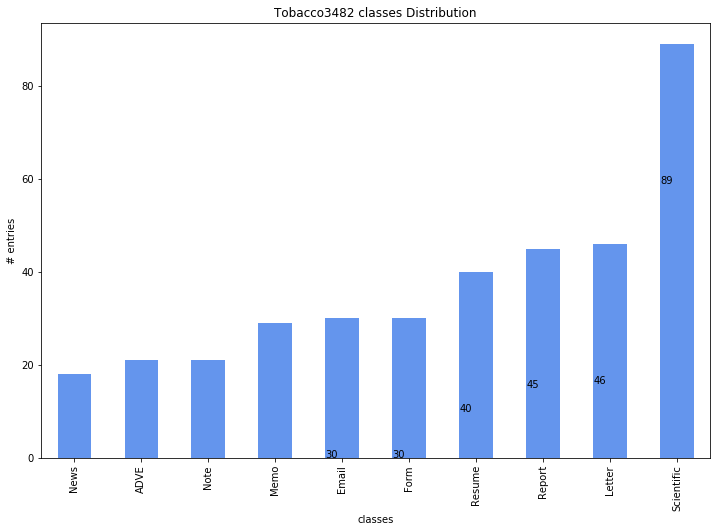

In [3]:
d = 'D:\Education\MSCS\Research\Rabia Thesis\DS\Tobacco3482-jpg/'
PATH = '../'

classes = (os.listdir(d))

paths = [os.path.join(d, o) for o in os.listdir(d) 
                    if os.path.isdir(os.path.join(d,o))]

nbEntries = []

for i in range(len(classes)):
    nbEntries.append(len(os.listdir(paths[i])))

#################################################
    
print(classes)
print(nbEntries)

df = pd.DataFrame({'classes':classes, 'entries':nbEntries})
ax = df.sort_values(by='entries', ascending=True).plot.bar(x='classes', y='entries', color='cornflowerblue',legend=False, figsize=(12,8))
ax.set_title('Tobacco3482 classes Distribution')
ax.set_ylabel("# entries")
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()-30))

# Get all images

In [4]:
total_set = []
total_labels = []


for root, dirs, files in os.walk(d):
    for file in files:
        if file.endswith(".jpg"):
            path = os.path.join(root, file)
            total_set.append(path)
            total_labels.append(root.split(os.path.sep)[-1])
            

# Return image class based on list entry (path)         
def getClass(img):
    return img.split(os.path.sep)[-2]


print(total_set[0])
print('GetClass : ', getClass(total_set[0]))
print('Label : ', total_labels[0])

D:\Education\MSCS\Research\Rabia Thesis\DS\Tobacco3482-jpg/ADVE\2084396082.jpg
GetClass :  Tobacco3482-jpg/ADVE
Label :  Tobacco3482-jpg/ADVE


# Plot data 

D:\Education\MSCS\Research\Rabia Thesis\DS\Tobacco3482-jpg/Form\2505233645_3646.jpg


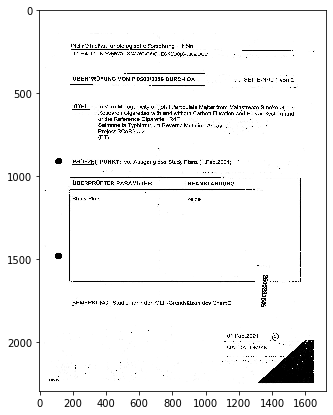

D:\Education\MSCS\Research\Rabia Thesis\DS\Tobacco3482-jpg/Memo\titx0625.92_titx0626.16.jpg


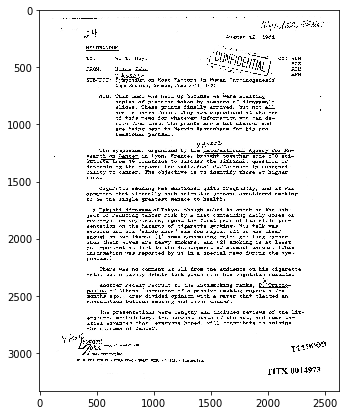

D:\Education\MSCS\Research\Rabia Thesis\DS\Tobacco3482-jpg/News\2083790656.jpg


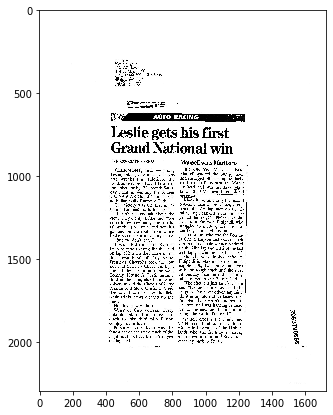

In [5]:
random.Random(seed).shuffle(total_set)

for ima in total_set[0:3] :
    print(ima)
    img = mpimg.imread(ima)
    plt.figure(figsize=(7,7))
    imgplot = plt.imshow(img, cmap="gray")
    plt.show()


# Sorting data in usable sets
![](https://cdn-images-1.medium.com/max/800/1*HpvpA9pBJXKxaPCl5tKnLg.jpeg)

In [6]:
# Get data and separate it in sets
total_len = len(total_set)
##print(total_len)
index = 0
train_set = []
train_label = []
val_set = []
val_label = []
test_set = []
test_label = []

for i in total_set[0: int(total_len*train_size)] :
    train_set.append(i)
    train_label.append(getClass(i))
index = int(total_len*train_size)+1
    
for i in total_set[index: int(index + total_len*val_size)] :
    val_set.append(i)
    val_label.append(getClass(i))
    
index = int(index + total_len*val_size)+1 

for i in total_set[index: total_len] :
    test_set.append(i)
    test_label.append(getClass(i))
print(val_set[:2])
print(val_label[:2])


['D:\\Education\\MSCS\\Research\\Rabia Thesis\\DS\\Tobacco3482-jpg/Resume\\50617225-7226.jpg', 'D:\\Education\\MSCS\\Research\\Rabia Thesis\\DS\\Tobacco3482-jpg/ADVE\\2084426012_6013.jpg']
['Tobacco3482-jpg/Resume', 'Tobacco3482-jpg/ADVE']


## Visualize classes distribution

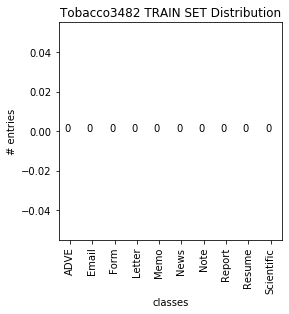

In [7]:
#################################################
# TRAIN SET
instances = [0] * len(classes)
for index, val in enumerate(classes) :
    for e in train_set :
        if(val == getClass(e)) :
            instances[index] += 1 
df = pd.DataFrame({'classes':classes, 'entries':instances})
ax = df.sort_values(by='entries', ascending=True).plot.bar(x='classes', y='entries', color='red',legend=False, figsize=(4,4))
ax.set_title('Tobacco3482 TRAIN SET Distribution')
ax.set_ylabel("# entries")
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()/2))
#################################################

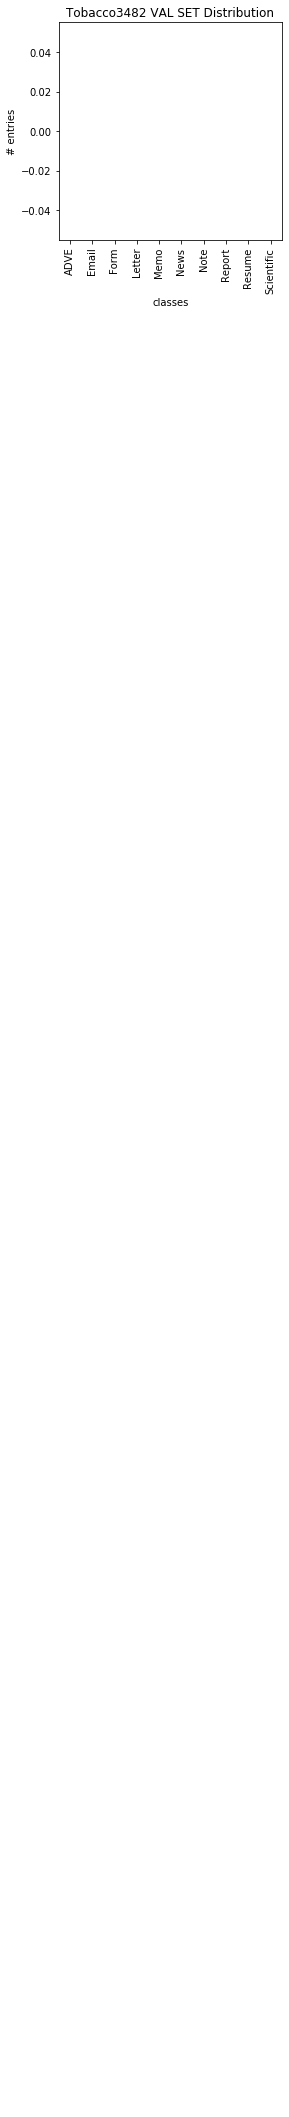

In [8]:
# VAL SET
instances = [0] * len(classes)
for index, val in enumerate(classes) :
    for e in val_set :
        if(val == getClass(e)) :
            instances[index] += 1           
df = pd.DataFrame({'classes':classes, 'entries':instances})
ax = df.sort_values(by='entries', ascending=True).plot.bar(x='classes', y='entries', color='cornflowerblue',legend=False, figsize=(4,4))
ax.set_title('Tobacco3482 VAL SET Distribution')
ax.set_ylabel("# entries")
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()-1))
    
#################################################

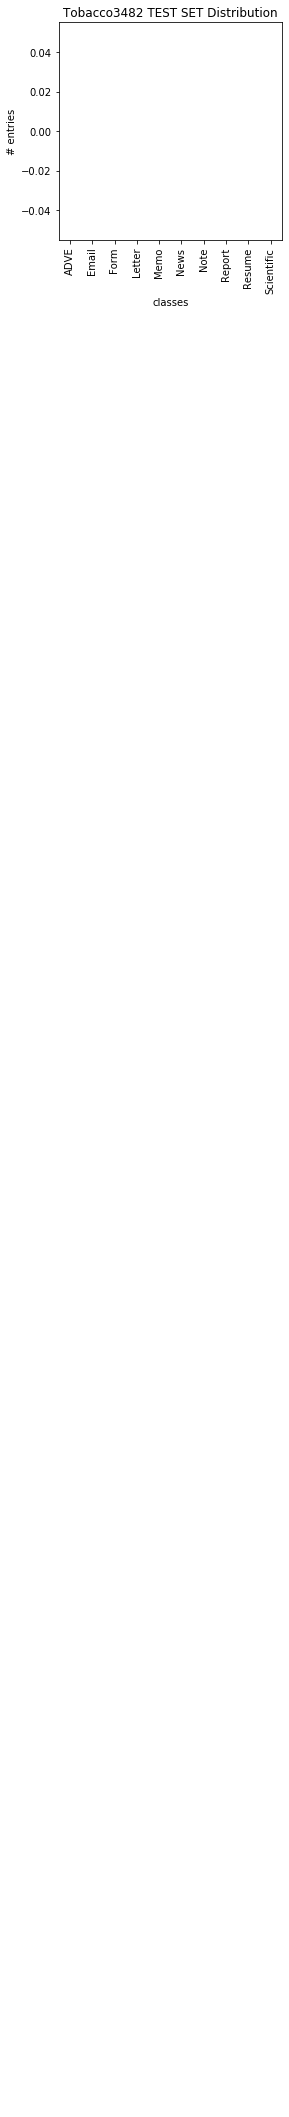

In [9]:
# TEST SET
instances = [0] * len(classes)
for index, val in enumerate(classes) :
    for e in test_set :
        if(val == getClass(e)) :
            instances[index] += 1        
df = pd.DataFrame({'classes':classes, 'entries':instances})
ax = df.sort_values(by='entries', ascending=True).plot.bar(x='classes', y='entries', color='cornflowerblue',legend=False, figsize=(4,4))
ax.set_title('Tobacco3482 TEST SET Distribution')
ax.set_ylabel("# entries")
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()-1))

# Preprocess data (resize and transform to Numpy array)

In [10]:
def process_images(img_set) : 
    processed_img = []

    for i in range(len(img_set)) :
        processed_img.append(cv2.resize(cv2.imread(img_set[i], cv2.IMREAD_COLOR), (img_size, img_size)))
    
    return processed_img
    
x_train = process_images(train_set)
x_test = process_images(test_set)
x_val = process_images(val_set)

train shape :  (251, 299, 299, 3)
(251, 10)
test shape :  (35, 299, 299, 3)
(35, 10)
valdiation shape :  (72, 299, 299, 3)
(72, 10)
Tobacco3482-jpg/Form
[0 0 0 0 0 0 0 0 0 0]
['ADVE' 'Email' 'Form' 'Letter' 'Memo' 'News' 'Note' 'Report' 'Resume'
 'Scientific']


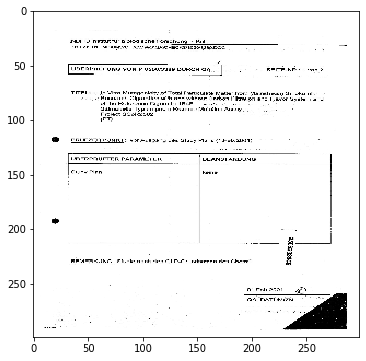

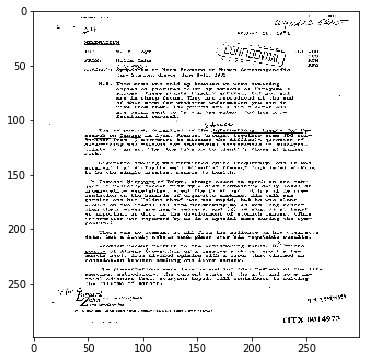

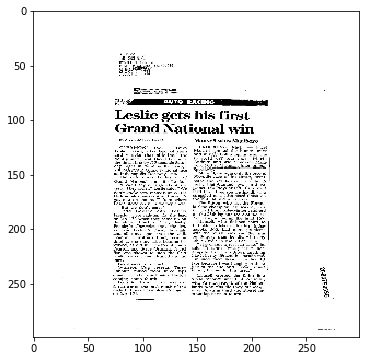

In [11]:
lb = LabelBinarizer()
lb.fit(list(classes))

x_train = np.array(x_train)
y_train =lb.transform(np.array(train_label))

x_test = np.array(x_test)
y_test = lb.transform(np.array(test_label))

x_val = np.array(x_val)
y_val = lb.transform(np.array(val_label))

print("train shape : ", x_train.shape)
print(y_train.shape)
print("test shape : ", x_test.shape)
print(y_test.shape)
print("valdiation shape : ", x_val.shape)
print(y_val.shape)


for i in range(3) :
    plt.figure(figsize=(6,6))
    imgplot = plt.imshow(x_train[i])

print(train_label[0])
print(y_train[0])
print(lb.classes_)

# Creating model (pretrained CNN)

In [12]:
base_model = Xception(weights = "imagenet", include_top=False, input_shape = (img_size, img_size, channels))

#for layer in base_model.layers:
#    layer.trainable = False
    
base_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
_____________________________________

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

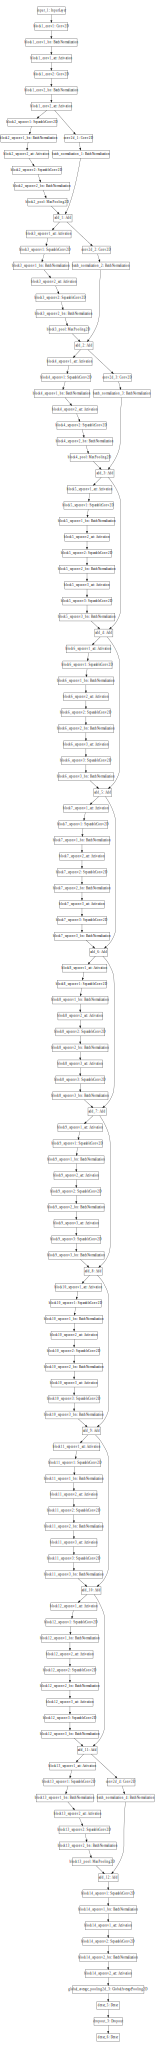

In [34]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x) 
x = Dropout(0.5)(x)
predictions = Dense(len(classes), activation='softmax')(x)

# add your top layer block to your base model
model = Model(base_model.input, predictions)
    
model.summary()

print('Number of trainable weights : ', len(model.trainable_weights))

#plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [14]:
model.compile(optimizer=optimizers.Adam(lr=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

train_model = model.fit(x_train, y_train,
                        batch_size=10,
                        epochs=5,
                        verbose=1,
                        validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 251 samples, validate on 72 samples
Epoch 1/5
251/251 [==============================] - 669s 3s/step - loss: 0.0000e+00 - acc: 0.0598 - val_loss: 0.0000e+00 - val_acc: 0.0139
Epoch 2/5
251/251 [==============================] - 631s 3s/step - loss: 0.0000e+00 - acc: 0.0757 - val_loss: 0.0000e+00 - val_acc: 0.0417
Epoch 3/5
251/251 [==============================] - 642s 3s/step - loss: 0.0000e+00 - acc: 0.0478 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 4/5
251/251 [==============================] - 650s 3s/step - loss: 0.0000e+00 - acc: 0.0637 - val_loss: 0.0000e+00 - val_acc: 0.0139
Epoch 5/5
251/251 [==============================] - 679s 3s/step - loss: 0.0000e+00 - acc: 0.0398 - val_loss: 0.0000e+00 - val_acc: 0.0278


# Plot accuracy and loss

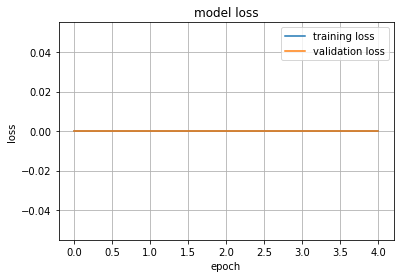

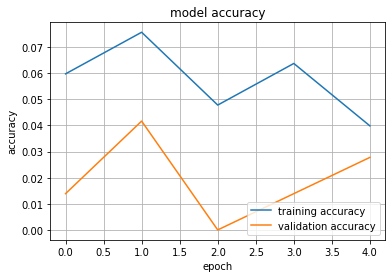

In [29]:
plt.plot(train_model.history['loss'])
plt.plot(train_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()
plt.legend(['training loss', 'validation loss'], loc='upper right')
plt.show()

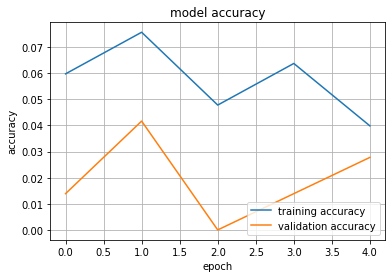

In [32]:
plt.plot(train_model.history['acc'])
plt.plot(train_model.history['val_acc'])
plt.title('model accuracy')
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'validation accuracy'], loc='lower right')
plt.show()

# Test prediction accuracy

In [30]:
#score = model.evaluate(x_test, y_test, verbose=1)
#print('Test loss:', score[0])
print("Model, accuracy: {:5.2f}%".format(100*accuracy))

NameError: name 'accuracy' is not defined